In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#subroutine to read in all experiments from single excel file
def readData(fname):
    xl = pd.ExcelFile(fname)
    sheet_names = xl.sheet_names #)  # see all sheet names
    #print(sheet_names)
    istart=0
    for sheet_name in sheet_names:
        if sheet_name=='Metadata':
            continue
        ds1 = xl.parse(sheet_name,header=0,skiprows=1)
        if istart==0:
            ds=ds1
            istart=1
        else:
            ds=pd.concat([ds,ds1]) #ds.append(ds1)
        #print(type(ds1))
        #print(type(ds))
        print(sheet_name,len(ds))
    return ds


In [6]:
adir = 'C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/2018dave/'
file = adir + 'Master_Data_Jump_Test_2014_2017_2018.xlsx' #'Duplicate_Master_Data_Jump_Test_2014_2017_2018.xlsx'
ds = readData(file)
df = pd.DataFrame(ds)


2014_2 101
2014_3 198
2014_4 289
2014_5 390
2014_6 491
2014_7 590
2014_8 689
2014_9 792
2014_10 903
2014_12 1003
2014_13 1107
2014_14 1206
2014_15 1306
2014_16 1408
2014_17 1509
2014_18 1609
2014_19 1710
2014_20 1810
2014_21 1910
2014_22 2010
2014_23 2111
2014_24 2211
2014_25 2308
2014_26 2407
2014_27 2507
2014_28 2606
2017_1 2711
2017_2 2816
2017_3 2918
2017_4 3019
2017_5 3121
2017_6 3221
2017_7 3320
2017_8 3421
2017_9 3522
2017_10 3622
2017_11 3724
2017_12 3826
2017_14 3924
2017_15 4028
2017_16 4130
2017_17 4231
2017_18 4338
2017_20 4432
2018_1 4535
2018_2 4638
2018_3 4751
2018_4 4853
2018_5 4965
2018_6 5370


In [7]:
df.head()

Experiment_number        start_time    species  total_time  \
0            2014_2  20140702T191500Z  steelhead        24.0   
1            2014_2  20140702T191500Z  steelhead        24.0   
2            2014_2  20140702T191500Z  steelhead        24.0   
3            2014_2  20140702T191500Z  steelhead        24.0   
4            2014_2  20140702T191500Z  steelhead        24.0   

   water_temperature  dissolved_oxygen  upper_pool_depth  lower_pool_depth  \
0               12.4              10.6              23.0              11.5   
1               12.4              10.6              23.0              11.5   
2               12.4              10.6              23.0              11.5   
3               12.4              10.6              23.0              11.5   
4               12.4              10.6              23.0              11.5   

   depth_over_wier  flow_rate  height_difference  fish_number  length  weight  \
0             1.75          0               11.5            1      70    4.05   
1             1.75          0               11.5            2      77    5.82   
2             1.75          0               11.5            3      78    5.61   
3             1.75          0               11.5            4      79    5.92   
4             1.75          0               11.5            5      72    4.43   

   successful_jump  k_factor       weir_type  
0                1  1.180758  12_narrow_flat  
1                1  1.274826  12_narrow_flat  
2                1  1.182168  12_narrow_flat  
3                1  1.200716  12_narrow_flat  
4                1  1.186878  12_narrow_flat

In [8]:
#get some info about the data
#print out number of fish per experiment for table on data
print(ds.groupby('Experiment_number').fish_number.max())
cond_6 = (ds.height_difference<8)  #6" jumps
cond_12 = (ds.height_difference>8) & (ds.height_difference<15)  #12" jumps
cond_18 = (ds.height_difference>15)  #18" jumps
subset = ds[cond_6]
print('6',subset.groupby('Experiment_number').fish_number.max())
subset = ds[cond_12]
print('12',subset.groupby('Experiment_number').fish_number.max())
subset = ds[cond_18]
print('18',subset.groupby('Experiment_number').fish_number.max())


Experiment_number
2014_10    111
2014_12    100
2014_13    104
2014_14     99
2014_15    100
2014_16    102
2014_17    101
2014_18    100
2014_19    101
2014_2     101
2014_20    100
2014_21    100
2014_22    100
2014_23    101
2014_24    100
2014_25     97
2014_26     99
2014_27    100
2014_28     99
2014_3      97
2014_4      91
2014_5     101
2014_6     101
2014_7      99
2014_8      99
2014_9     103
2017_1     105
2017_10    100
2017_11    102
2017_12    102
2017_14     98
2017_15    104
2017_16    102
2017_17    101
2017_18    107
2017_2     105
2017_20     94
2017_3     102
2017_4     101
2017_5     102
2017_6     100
2017_7      99
2017_8     101
2017_9     101
2018_1     103
2018_2     103
2018_3     113
2018_4     102
2018_5     112
2018_6     405
Name: fish_number, dtype: int64
6 Experiment_number
2014_16    102
2014_17    101
2014_20    100
2014_26     99
2014_27    100
2014_28     99
2014_7      99
2014_8      99
2014_9     103
2017_10    100
2017_17    101
2017_18    107


In [9]:
# the histogram of the data
#fig = plt.figure()
#n, bins, patches = plt.hist(subset_lower.k_factor, 50, normed=1, facecolor='g', alpha=0.75)
#plt.xlabel('k_factor')
#plt.ylabel('Probability')
#plt.title('Histogram of k_factor')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([0, 2, 0, 0.03])
#plt.grid(True)
#fig.savefig(adir+'hist.png', dpi=300)

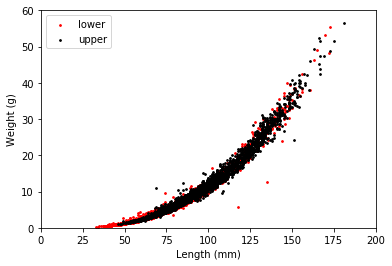

In [25]:
#plot all fish
cond_lower = (ds.successful_jump==0)   # stayed in lower pool, unsuccessful jumper
cond_upper = (ds.successful_jump==1)  #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
fig = plt.figure()
h=plt.scatter(subset_lower.length,subset_lower.weight,color='r',marker='.',s=12,label="lower")
h=plt.scatter(subset_upper.length,subset_upper.weight,color='k',marker='.',s=12,label="upper")
plt.axis([0, 200,0, 60])
plt.ylabel('Weight (g)')
plt.xlabel('Length (mm)')
plt.legend()
fig.savefig(adir+'all_scatter.png', dpi=300)

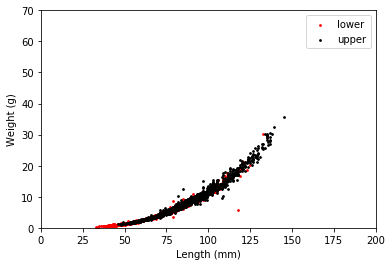

In [11]:
#6" jumps
#cond_lower = ((ds.successful_jump==0) & (ds.height_difference<10))  # stayed in lower pool, unsuccessful jumper
#cond_upper = ((ds.successful_jump==1) & (ds.height_difference<10)) #made it to upper pool
cond_lower = ((ds.successful_jump==0) & cond_6)  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & cond_6) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
fig = plt.figure()
h=plt.scatter(subset_lower.length,subset_lower.weight,color='r',marker='.',s=12,label="lower")
h=plt.scatter(subset_upper.length,subset_upper.weight,color='k',marker='.',s=12,label="upper")
plt.axis([0, 200,0, 70])
plt.ylabel('Weight (g)')
plt.xlabel('Length (mm)')
plt.legend()
fig.savefig(adir+'six_scatter.png', dpi=300)

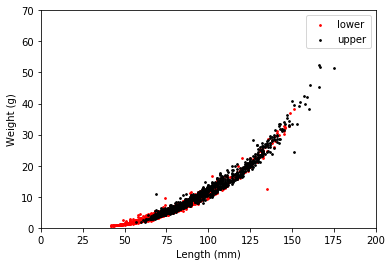

In [12]:
#12" jumps
cond_lower = ((ds.successful_jump==0) & cond_12)  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & cond_12) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
fig = plt.figure()
h=plt.scatter(subset_lower.length,subset_lower.weight,color='r',marker='.',s=12,label="lower")
h=plt.scatter(subset_upper.length,subset_upper.weight,color='k',marker='.',s=12,label="upper")
plt.axis([0, 200,0, 70])
plt.ylabel('Weight (g)')
plt.xlabel('Length (mm)')
plt.legend()
fig.savefig(adir+'twelve_scatter.png', dpi=300)

405
188 65.72


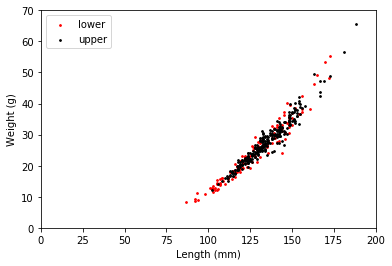

In [13]:
#12" jumps
cond_lower = ((ds.successful_jump==0) & cond_18)  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & cond_18) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
fig = plt.figure()
h=plt.scatter(subset_lower.length,subset_lower.weight,color='r',marker='.',s=12,label="lower")
h=plt.scatter(subset_upper.length,subset_upper.weight,color='k',marker='.',s=12,label="upper")
plt.axis([0, 200,0, 70])
plt.ylabel('Weight (g)')
plt.xlabel('Length (mm)')
plt.legend()
fig.savefig(adir+'eighteen_scatter.png', dpi=300)
print(cond_lower.sum()+cond_upper.sum())
print(ds.length.max(),ds.weight.max())

In [14]:
cols = df.columns.tolist()
print(cols)
cols_reorder = cols[12:13] + cols[15:16] + cols[14:15]
df_reorder=df[cols_reorder]
df_reorder.head()

['Experiment_number', 'start_time', 'species', 'total_time', 'water_temperature', 'dissolved_oxygen', 'upper_pool_depth', 'lower_pool_depth', 'depth_over_wier', 'flow_rate', 'height_difference', 'fish_number', 'length', 'weight', 'successful_jump', 'k_factor', 'weir_type']


length  k_factor  successful_jump
0      70  1.180758                1
1      77  1.274826                1
2      78  1.182168                1
3      79  1.200716                1
4      72  1.186878                1

In [28]:
x = df_reorder.iloc[:,0:1].values  #just length  0.79 accuracy new with all data 0.71
#x = df_reorder.iloc[:,1:2].values    #just k-factor  0.71 accuracy new with all data 0.56
#x = df_reorder.iloc[:,0:2].values     #both length and k-factor but worried about their correlation  0.78 accuracy, new 0.74
y= df_reorder.iloc[:,2].values
# Split the data into Training and Testing set
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)
# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
from sklearn import metrics
print (metrics.accuracy_score(y_test,classifier.predict(x_test)))

0.7110945644080418


C:\Users\gentemann\Miniconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\gentemann\Miniconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\gentemann\Miniconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\gentemann\Miniconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\gentemann\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will

In [29]:
cm

array([[593, 129],
       [259, 362]], dtype=int64)

C:\Users\gentemann\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\gentemann\Miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
C:\Users\gentemann\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


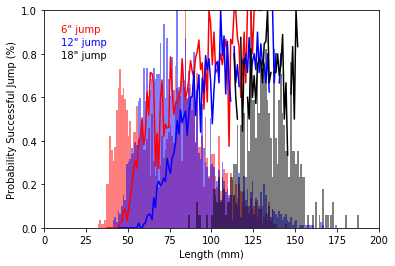

In [17]:
#make figure showing prob of successful jump for different jump heights
fish_num_cutoff = 5
fish_length_int=ds.length.values.astype(int)
width_bin=1
hbins = np.arange(0,200,width_bin)-.5
cond_lower = ((ds.successful_jump==0) & cond_6)  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & cond_6) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
hist_jump, bin_edges = np.histogram(fish_length_int[cond_upper],bins=hbins)
hist_nojump, bin_edges = np.histogram(fish_length_int[cond_lower],bins=hbins)
tot_fish = hist_jump + hist_nojump
cond_num = (tot_fish < fish_num_cutoff)
prob_jump_6 = hist_jump / tot_fish
prob_jump_6[cond_num]=np.nan
cond_lower = ((ds.successful_jump==0) & cond_12)  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & cond_12) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
hist_jump, bin_edges = np.histogram(fish_length_int[cond_upper],bins=hbins)
hist_nojump, bin_edges = np.histogram(fish_length_int[cond_lower],bins=hbins)
tot_fish = hist_jump + hist_nojump
cond_num = (tot_fish < fish_num_cutoff)
prob_jump_12 = hist_jump / tot_fish
prob_jump_12[cond_num]=np.nan
cond_lower = ((ds.successful_jump==0) & cond_18)  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & cond_18) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
hist_jump, bin_edges = np.histogram(fish_length_int[cond_upper],bins=hbins)
hist_nojump, bin_edges = np.histogram(fish_length_int[cond_lower],bins=hbins)
tot_fish = hist_jump + hist_nojump
cond_num = (tot_fish < fish_num_cutoff)
prob_jump_18 = hist_jump / tot_fish
prob_jump_18[cond_num]=np.nan
fig = plt.figure()
hfish,hbin2=np.histogram(fish_length_int[cond_6],bins=hbins)
plt.bar(bin_edges[:-1],hfish/hfish.max(),width=width_bin, color='r', alpha=0.5)
hfish,hbin2=np.histogram(fish_length_int[cond_12],bins=hbins)
plt.bar(bin_edges[:-1],hfish/hfish.max(), width=width_bin,color='b', alpha=0.5)
hfish,hbin2=np.histogram(fish_length_int[cond_18],bins=hbins)
plt.bar(bin_edges[:-1],hfish/hfish.max(),width=width_bin, color='k', alpha=0.5)
plt.plot(bin_edges[:-1],prob_jump_6, color='r')
plt.plot(bin_edges[:-1],prob_jump_12, color='b')
plt.plot(bin_edges[:-1],prob_jump_18, color='k')
plt.axis([0, 200,0, 1])
plt.ylabel('Probability Successful Jump (%)')
plt.xlabel('Length (mm)')
plt.text(10,.9,'6" jump',color='r')
plt.text(10,.84,'12" jump',color='b')
plt.text(10,.78,'18" jump',color='k')
fig.savefig(adir+'prob_1mmbins.png', dpi=300)
    

C:\Users\gentemann\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\gentemann\Miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
C:\Users\gentemann\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


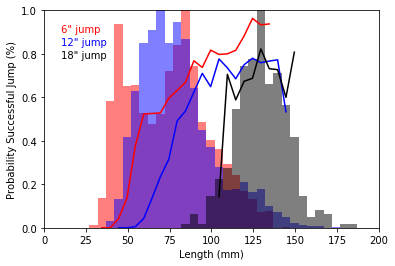

In [18]:
#prob successful jump, in 5mm bins rather than 1mm bins
fish_num_cutoff = 10
fish_length_int=ds.length.values.astype(int)
width_bin=5
hbins = np.arange(0,200,width_bin)-.5
cond_lower = ((ds.successful_jump==0) & cond_6)  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & cond_6) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
hist_jump, bin_edges = np.histogram(fish_length_int[cond_upper],bins=hbins)
hist_nojump, bin_edges = np.histogram(fish_length_int[cond_lower],bins=hbins)
tot_fish = hist_jump + hist_nojump
cond_num = (tot_fish < fish_num_cutoff)
prob_jump_6 = hist_jump / tot_fish
prob_jump_6[cond_num]=np.nan
cond_lower = ((ds.successful_jump==0) & cond_12)  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & cond_12) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
hist_jump, bin_edges = np.histogram(fish_length_int[cond_upper],bins=hbins)
hist_nojump, bin_edges = np.histogram(fish_length_int[cond_lower],bins=hbins)
tot_fish = hist_jump + hist_nojump
cond_num = (tot_fish < fish_num_cutoff)
prob_jump_12 = hist_jump / tot_fish
prob_jump_12[cond_num]=np.nan
cond_lower = ((ds.successful_jump==0) & cond_18)  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & cond_18) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
hist_jump, bin_edges = np.histogram(fish_length_int[cond_upper],bins=hbins)
hist_nojump, bin_edges = np.histogram(fish_length_int[cond_lower],bins=hbins)
tot_fish = hist_jump + hist_nojump
cond_num = (tot_fish < fish_num_cutoff)
prob_jump_18 = hist_jump / tot_fish
prob_jump_18[cond_num]=np.nan
fig = plt.figure()
hfish,hbin2=np.histogram(fish_length_int[cond_6],bins=hbins)
plt.bar(bin_edges[:-1],hfish/hfish.max(), width=width_bin,color='r', alpha=0.5)
hfish,hbin2=np.histogram(fish_length_int[cond_12],bins=hbins)
plt.bar(bin_edges[:-1],hfish/hfish.max(), width=width_bin,color='b', alpha=0.5)
hfish,hbin2=np.histogram(fish_length_int[cond_18],bins=hbins)
plt.bar(bin_edges[:-1],hfish/hfish.max(), width=width_bin,color='k', alpha=0.5)
plt.plot(bin_edges[:-1],prob_jump_6, color='r')
plt.plot(bin_edges[:-1],prob_jump_12, color='b')
plt.plot(bin_edges[:-1],prob_jump_18, color='k')
plt.axis([0, 200,0, 1])
plt.ylabel('Probability Successful Jump (%)')
plt.xlabel('Length (mm)')
plt.text(10,.9,'6" jump',color='r')
plt.text(10,.84,'12" jump',color='b')
plt.text(10,.78,'18" jump',color='k')
fig.savefig(adir+'prob_'+str(width_bin)+'mmbins.png', dpi=300)

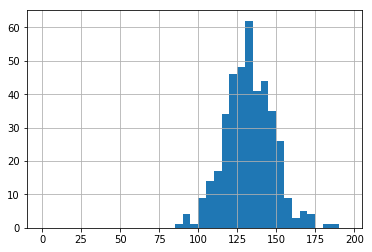

In [19]:
#hbins = np.arange(0,200,10)-.5
#cond_lower = ((ds.successful_jump==0) & cond_6)  # stayed in lower pool, unsuccessful jumper
#cond_upper = ((ds.successful_jump==1) & cond_6) #made it to upper pool
ds.length[cond_18].hist(bins=range(0,200,5))


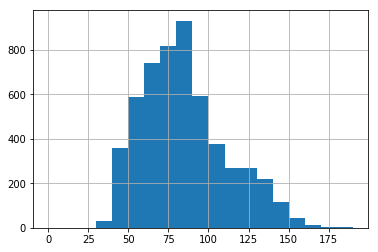

In [20]:
ds.length.hist(bins=range(0,200,10))